# 逆概率分布(Inverse Probability Transform)



### 1. 逆概率变换（Inverse Probability Transform）
**逆概率变换**是一种从随机变量的均匀分布生成满足特定概率分布的随机变量的方法。它依赖于累积分布函数（CDF）的性质，即任何连续的随机变量都可以通过一个均匀分布变量来构造。

**假设我们想要获得P(X),如果我们知道这个分布P(X)的累积分布函数$ F_X(x) $，那么我们就可以构造P(X)了**

#### 原理
假设我们有一个目标随机变量 $ X $ ，它的累积分布函数为 $ F_X(x) $，定义为：
$$
F_X(x) = P(X \leq x)
$$
其中，$ F_X(x) $ 是一个非递减且取值范围为 [0, 1] 的函数。

步骤如下：
1. 从 [0, 1] 均匀分布中生成一个随机数 $ U $。
2. 通过 $ X = F_X^{-1}(U) $ 计算生成的随机变量，其中 $ F_X^{-1} $ 表示 $ F_X(x) $ 的逆函数。

#### 公式总结
若 $ U \sim \text{Uniform}(0, 1) $，则：
$$
X = F_X^{-1}(U)
$$
此 $ X $ 服从 $ F_X $ 对应的概率分布。

#### 示例
假设目标分布是指数分布 $ X \sim \text{Exp}(\lambda) $，其 CDF 为：
$$
F_X(x) = 1 - e^{-\lambda x}, \quad x \geq 0
$$
反函数为：
$$
F_X^{-1}(u) = -\frac{1}{\lambda} \ln(1 - u)
$$
生成步骤：
1. 生成均匀分布变量 $ U \sim \text{Uniform}(0, 1) $。
2. 计算 $ X = -\frac{1}{\lambda} \ln(1 - U) $。
这样生成的 $ X $ 就服从 $ \text{Exp}(\lambda) $。

其中指数分布$ \text{Exp}(\lambda) $表示为：
$$
P(x) = 
\begin{cases} 
\lambda e^{-\lambda x}, & x \geq 0, \\
0, & x < 0,
\end{cases}
$$




### 数学证明（直观）
我们证明通过逆概率变换生成的变量确实符合目标分布：

1. 假设 $ U \sim \text{Uniform}(0, 1) $，定义 $ X = F_X^{-1}(U) $。
2. 对任意值 $ x $，计算 $ P(X \leq x) $：
   $$
   P(X \leq x) = P(F_X^{-1}(U) \leq x).
   $$
3. 因为 $ F_X^{-1} $ 和 $ F_X $ 是互为逆函数，得：
   $$
   P(F_X^{-1}(U) \leq x) =  P(U \leq F_X(x)).
   $$

   $ F_X^{-1}(U) \leq x $ 表示当且仅当：$ U \leq F_X(x) $
   
   <br/>

4. 因为 $ U \sim \text{Uniform}(0, 1) $，所以 $ P(U \leq F_X(x)) = F_X(x) $。
5. 因此：
   $$
   P(X \leq x) = F_X(x).
   $$
这表明 $ X $ 的分布完全由 $ F_X $ 描述，即符合目标分布。


## 绘图

下图可以直观的看出$ F_X^{-1}(U) \leq x $ 表示当且仅当：$ U \leq F_X(x) $

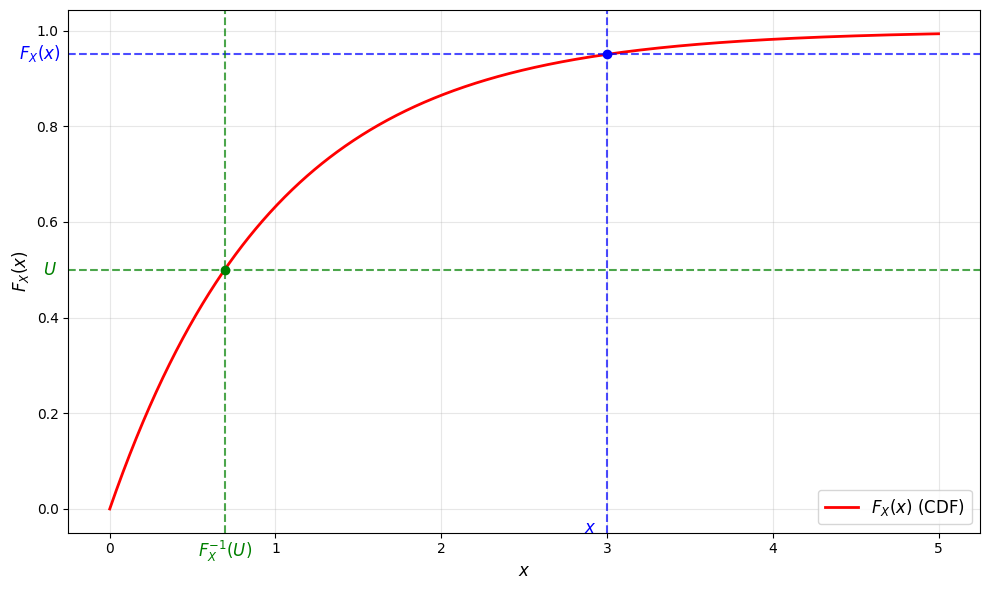

In [27]:
# Reimport necessary libraries after the reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
lambda_param = 1  # Rate parameter for the exponential distribution
x_vals = np.linspace(0, 5, 1000)  # X-axis values for the plot
cdf_vals = expon.cdf(x_vals, scale=1/lambda_param)  # Exponential CDF

# Points for annotation
x = 3  # Example x-value
F_x = expon.cdf(x, scale=1/lambda_param)  # Corresponding CDF value F_X(x)
U = 0.5  # Example U-value
x_from_U = expon.ppf(U, scale=1/lambda_param)  # Corresponding x value from F_X^{-1}(U)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(x_vals, cdf_vals, 'r-', label=r'$F_X(x)$ (CDF)', linewidth=2)

# Plot the vertical and horizontal annotations for x and F_X(x)
plt.axvline(x=x, color='blue', linestyle='--', alpha=0.7)
plt.axhline(y=F_x, color='blue', linestyle='--', alpha=0.7)
plt.scatter([x], [F_x], color='blue', zorder=5)
plt.text(-0.55, F_x - 0.01, r"$F_X(x)$", fontsize=12, color="blue")

# Annotate the x value
plt.text(x -0.1, -0.05, r"$x$", fontsize=12, color="blue", ha='center')

# Plot the vertical and horizontal annotations for U and F_X^{-1}(U)
plt.axhline(y=U, color='green', linestyle='--', alpha=0.7)
plt.axvline(x=x_from_U, color='green', linestyle='--', alpha=0.7)
plt.scatter([x_from_U], [U], color='green', zorder=5)
plt.text(x_from_U, -0.1, r"$F_X^{-1}(U)$", fontsize=12, color="green", ha='center')
plt.text(-0.4, U, r"$U$", fontsize=12, color="green", va='center')

# Add labels and title
# plt.title(r"Illustration of $P(F_X^{-1}(U) \\leq x) \\iff P(U \\leq F_X(x))$", fontsize=14)
plt.xlabel(r"$x$", fontsize=12)
plt.ylabel(r"$F_X(x)$", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


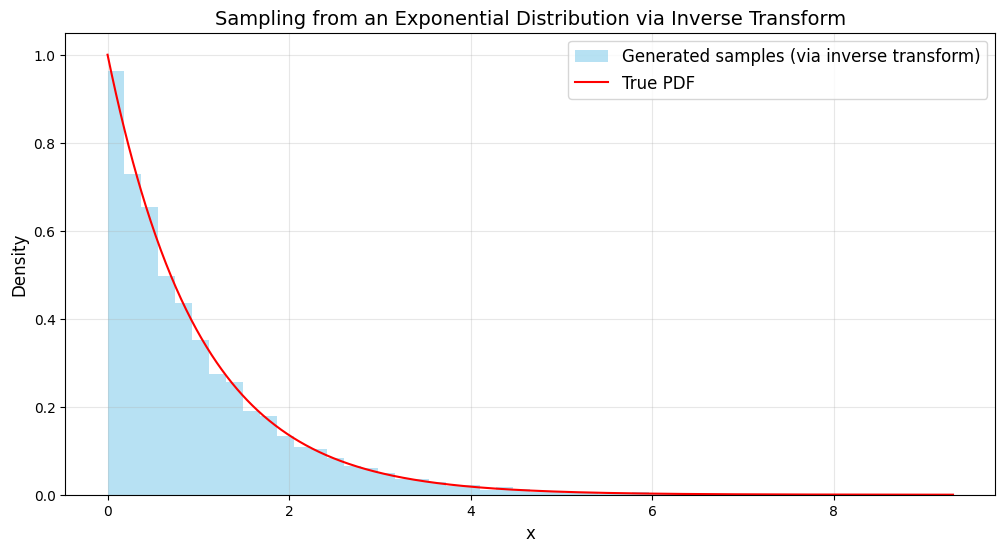

In [ ]:
# 定义目标分布(lambda为1的指数分布，其中lambda表示每单位时间发生该事件的次数)
lambda_param = 1  # 率参数
F_X = lambda x: 1 - np.exp(-lambda_param * x)  # CDF（累积分布函数）
F_X_inv = lambda u: -np.log(1 - u) / lambda_param  # Inverse CDF（逆CDF）

# 从均匀分布 Uniform(0, 1)中采样
num_samples = 10000
U = np.random.uniform(0, 1, num_samples)

# 对采样样本应用逆CDF函数
X = F_X_inv(U)

# 绘制图像，绘制直方图和PDF（概率密度函数）
plt.figure(figsize=(12, 6))
plt.hist(X, bins=50, density=True, alpha=0.6, color='skyblue', label='Generated samples (via inverse transform)')

# 绘制真正的目标概率密度函数
x_vals = np.linspace(0, max(X), 1000)
pdf_vals = expon.pdf(x_vals, scale=1/lambda_param)  # 指数分布的概率密度函数
plt.plot(x_vals, pdf_vals, 'r-', label='True PDF')

# 绘图
plt.title('Sampling from an Exponential Distribution via Inverse Transform', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


# 总结

这种方法是一种获得概率分布的方法

然而，在大多数的情况下，我们无法得到概率分布CDF，那么CDF的反函数就更难得到了。

因此，这种情况下，常用的方法就是 **拒绝接受采样(Rejection Sampling)** 了